In [1]:
import pandas as pd
import os, re
import json
from joblib import delayed, Parallel

        df.diff_time = pd.to_timedelta(df.diff_time)

In [ ]:
%%time

df = None
for idx in range(19):
    fn_ptn = "./edges/lot_%s_4696190.csv"
    tfn = fn_ptn%idx
    print(tfn)
    if type(df) == type(None):
        df = pd.read_csv(tfn)
        df.diff_time = pd.to_timedelta(df.diff_time)
    else:
        new_df = pd.read_csv(tfn)
        new_df.diff_time = pd.to_timedelta(new_df.diff_time)
        df = df.append(new_df)
    print(len(df.diff_time))

./edges/lot_0_4696190.csv
15359274
./edges/lot_1_4696190.csv
30722662
./edges/lot_2_4696190.csv
46085280
./edges/lot_3_4696190.csv
61445258
./edges/lot_4_4696190.csv
76810356
./edges/lot_5_4696190.csv
92175127
./edges/lot_6_4696190.csv


In [ ]:
df.to_csv("all_edges_%s.csv"%(len(df.diff_time)))

In [13]:
print(len(df.diff_time))

290977795


In [56]:
df['frm_scode'] = df['frm_state'].str.slice(0,1)
df['to_scode'] = df['to_state'].str.slice(0,1)
df.set_index(['frm_scode', 'to_scode'], inplace=True)

In [67]:
ndf = df.sort_index()

In [75]:
mkeys = list(df.index.values)

In [78]:
frm_scode = set([ x for x, y in mkeys])
to_scode = set([ y for x, y in mkeys])

In [79]:
print (len(frm_scode), len(to_scode))

17 17


In [80]:
mean_time = []
for f_scode in frm_scode:
    for t_scode in to_scode:
        print(f_scode, t_scode)
        if (f_scode, t_scode) in df.index:
            mean_time.append ( (
                   (f_scode, t_scode), 
                   len(df.loc[(f_scode, t_scode)]), 
                   df.loc[(f_scode, t_scode)].diff_time.mean()
                               ))

M M


/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py:536: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


M Y
M W
M Q
M O
M G
M L
M Z
M I
M H
M T
M X
M V
M S
M N
M P
M A
Y M
Y Y
Y W
Y Q
Y O
Y G
Y L
Y Z
Y I
Y H
Y T
Y X
Y V
Y S
Y N
Y P
Y A
W M
W Y
W W
W Q
W O
W G
W L
W Z
W I
W H
W T
W X
W V
W S
W N
W P
W A
Q M
Q Y
Q W
Q Q
Q O
Q G
Q L
Q Z
Q I
Q H
Q T
Q X
Q V
Q S
Q N
Q P
Q A
O M
O Y
O W
O Q
O O
O G
O L
O Z
O I
O H
O T
O X
O V
O S
O N
O P
O A
G M
G Y
G W
G Q
G O
G G
G L
G Z
G I
G H
G T
G X
G V
G S
G N
G P
G A
L M
L Y
L W
L Q
L O
L G
L L
L Z
L I
L H
L T
L X
L V
L S
L N
L P
L A
Z M
Z Y
Z W
Z Q
Z O
Z G
Z L
Z Z
Z I
Z H
Z T
Z X
Z V
Z S
Z N
Z P
Z A
I M
I Y
I W
I Q
I O
I G
I L
I Z
I I
I H
I T
I X
I V
I S
I N
I P
I A
H M
H Y
H W
H Q
H O
H G
H L
H Z
H I
H H
H T
H X
H V
H S
H N
H P
H A
T M
T Y
T W
T Q
T O
T G
T L
T Z
T I
T H
T T
T X
T V
T S
T N
T P
T A
X M
X Y
X W
X Q
X O
X G
X L
X Z
X I
X H
X T
X X
X V
X S
X N
X P
X A
V M
V Y
V W
V Q
V O
V G
V L
V Z
V I
V H
V T
V X
V V
V S
V N
V P
V A
S M
S Y
S W
S Q
S O
S G
S L
S Z
S I
S H
S T
S X
S V
S S
S N
S P
S A
N M
N Y
N W
N Q
N O
N G
N L
N Z
N I
N H
N T
N X
N V


In [81]:
print(len(mean_time))

211


In [95]:
mean_df = pd.DataFrame([ (x1[0], x1[1], x2, x3) for x1, x2, x3 in mean_time])

In [96]:
mean_df.columns = ['frm_code', 'to_code', 'cntr', 'mean_time']

In [97]:
mean_df.set_index(['frm_code', 'to_code'], inplace=True)

In [102]:
mean_df.sort_index()

cntr                mean_time
frm_code to_code                                   
A        A         1192365  22 days 14:01:41.345927
         G           45072   1 days 02:53:45.126264
         H           12687   0 days 10:50:50.332466
         I          101899   0 days 22:27:33.859213
         L              18   0 days 03:50:56.277777
         O             171   0 days 00:25:51.777777
         P          166391   0 days 13:58:38.873112
         Q            5702   1 days 11:42:43.908453
         S              65   1 days 00:11:37.846153
         T            2824   3 days 15:16:20.427053
         V          463495   0 days 20:35:31.968690
         W            1491   1 days 02:47:09.543259
         X            1683   1 days 15:17:26.573380
         Y         1182150   1 days 02:54:21.758014
         Z        61845982   0 days 07:52:59.221366
G        A           24564  13 days 20:13:50.447769
         G           22770   0 days 20:04:53.106192
         H            4059 -1 days +23:54:29.429908
         I         5335784   2 days 12:09:31.212273
         P            5125  10 days 20:17:43.460292
         Q            1862   1 days 21:46:10.902255
         S           60829   3 days 13:14:21.030232
         T          891498  18 days 20:01:23.339057
         V             831   3 days 22:25:52.670276
         W              61   2 days 19:30:31.245901
         X             206  19 days 21:49:06.810679
         Y         1306300   0 days 00:49:51.704786
         Z           55746  10 days 19:57:48.722078
H        A            9817   0 days 23:22:44.996536
         G           37013   1 days 08:41:55.785480
...                    ...                      ...
Y        A           43892   0 days 18:15:44.159459
         G         2363505   0 days 20:12:00.799186
         H        17046769   0 days 05:07:15.476585
         I        74231948   0 days 06:06:50.932671
         N               1          0 days 02:03:53
         P           18863   0 days 02:28:39.062132
         Q           10721   0 days 12:05:37.772782
         S             109   0 days 02:20:07.284403
         T            6732   0 days 02:51:59.504901
         V           33934   0 days 05:30:05.849089
         W            1970   0 days 04:39:49.324365
         X            4008   0 days 05:51:40.500499
         Y          319604   0 days 06:59:34.187941
         Z           78246   0 days 01:05:58.084426
Z        A          369411   3 days 02:30:33.672316
         G         6987350   0 days 15:55:18.331834
         H           83778   2 days 03:57:09.631227
         I          836587   1 days 07:41:21.059460
         L              30 -1 days +15:06:38.533333
         N               1        -2 days +23:24:44
         O               5 -1 days +19:54:59.400000
         P          885811   0 days 18:19:15.091536
         Q           13160   1 days 13:54:03.507826
         S             181   3 days 11:25:39.381215
         T           51688   3 days 10:14:08.315469
         V            4055   1 days 20:20:45.158323
         W           22459   1 days 03:09:02.474642
         X           84563   0 days 22:49:56.223655
         Y        75647648   0 days 21:11:54.718311
         Z        13297445   0 days 12:55:27.278250

[211 rows x 2 columns]

In [112]:
import numpy as np

In [113]:
mean_df['avg_hrs'] = mean_df.mean_time / np.timedelta64(1, 'h')

In [104]:
import matplotlib.pyplot as plt

In [105]:
%matplotlib inline

In [117]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 2.2MB/s ta 0:00:011
You are using pip version 19.0.2, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [118]:
import seaborn as sns


In [154]:
mean_df_xi = mean_df.reset_index()

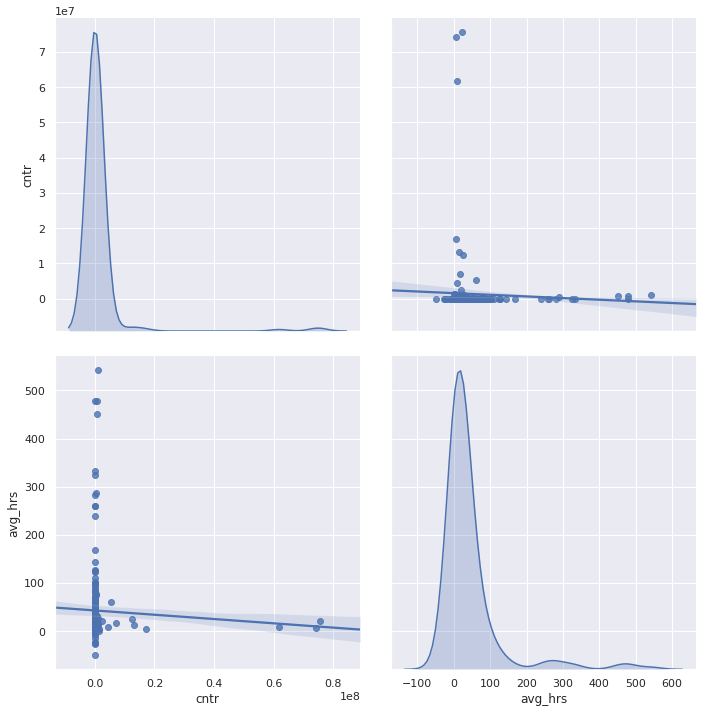

In [166]:
sns.set()
sns.pairplot(mean_df, height=5, kind="reg", diag_kind="kde", palette="GnBu_d");

In [178]:
t_code = set([x for (x, y) in mean_df.index.values])

In [189]:
from IPython.display import display, HTML


In [191]:
for tcode in sorted(t_code):
    print ("from status_code [%s]"%(tcode))
    mdf = mean_df.loc[tcode]
    mdf['cntr_pct'] = (100*mdf.cntr)/mdf.cntr.sum()
    del mdf['mean_time']
    display(HTML(mdf.sort_values("cntr_pct", ascending=False).to_html()))

from status_code [A]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cntr,avg_hrs,cntr_pct
to_code,,,
Z,61845982,7.883117,95.115479
A,1192365,542.028152,1.833787
Y,1182150,26.906044,1.818077
V,463495,20.592214,0.712828
P,166391,13.977465,0.255900
I,101899,22.459405,0.156715
G,45072,26.895868,0.069318
H,12687,10.847315,0.019512
Q,5702,35.712197,0.008769


from status_code [G]


,cntr,avg_hrs,cntr_pct
to_code,,,
I,5335784,60.158670,69.209295
Y,1306300,0.831029,16.943733
T,891498,452.023150,11.563427
S,60829,85.239175,0.789000
Z,55746,259.963534,0.723069
A,24564,332.230680,0.318614
G,22770,20.081418,0.295345
P,5125,260.295406,0.066475
H,4059,-0.091825,0.052648


from status_code [H]


,cntr,avg_hrs,cntr_pct
to_code,,,
Y,12348865,25.195103,69.135648
Z,4378472,8.189003,24.513063
X,463292,25.484364,2.593760
P,345154,12.509864,1.932359
T,99468,17.238903,0.556876
I,68680,8.417096,0.384508
W,51938,27.752121,0.290777
H,50328,17.752689,0.281763
G,37013,32.698829,0.207219


from status_code [I]


,cntr,avg_hrs,cntr_pct
to_code,,,
Q,1013289,15.411458,30.331283
A,627866,478.434077,18.794225
Z,530107,287.713073,15.867956
I,367496,34.408067,11.000440
V,355751,77.573282,10.648871
Y,226693,48.555264,6.785714
H,77912,61.348557,2.332179
G,67860,41.077322,2.031287
X,28120,41.403521,0.841730


from status_code [L]


,cntr,avg_hrs,cntr_pct
to_code,,,
A,4486,20.371216,69.485750
N,823,43.157247,12.747831
O,438,16.520832,6.784387
M,350,17.530537,5.421314
Z,257,19.198899,3.980793
Y,92,38.499158,1.425031
I,8,37.038229,0.123916
L,1,100.752778,0.015489
P,1,69.796111,0.015489


from status_code [M]


,cntr,avg_hrs,cntr_pct
to_code,,,
A,243,29.073517,44.833948
M,130,38.023041,23.985240
N,115,41.530449,21.217712
O,29,37.961906,5.350554
Y,13,35.546688,2.398524
Z,12,22.426806,2.214022


from status_code [N]


,cntr,avg_hrs,cntr_pct
to_code,,,
L,65,61.978073,68.421053
A,21,125.726958,22.105263
Z,3,144.104259,3.157895
Y,2,47.076250,2.105263
O,2,3.191111,2.105263
M,1,123.516111,1.052632
P,1,18.270833,1.052632


from status_code [O]


,cntr,avg_hrs,cntr_pct
to_code,,,
A,467,1.675660,70.437406
Z,160,3.960727,24.132730
Y,28,8.434534,4.223228
N,6,83.929074,0.904977
M,1,0.029444,0.150830
P,1,14.753056,0.150830


from status_code [P]


,cntr,avg_hrs,cntr_pct
to_code,,,
Y,1155135,12.341785,73.345211
Z,155640,11.614706,9.882350
P,92262,24.125427,5.858169
X,57100,25.800481,3.625560
G,49472,13.688733,3.141221
I,24634,18.564028,1.564134
A,11897,2.681337,0.755399
W,11742,41.850139,0.745557
H,8994,17.665809,0.571073


from status_code [Q]


,cntr,avg_hrs,cntr_pct
to_code,,,
I,16513,3.727153,47.894309
A,5344,167.803428,15.499739
Z,5020,-6.846341,14.560009
G,3626,-1.995766,10.516851
V,1776,15.723635,5.151111
Y,874,9.756225,2.534950
W,526,18.945225,1.525611
Q,494,30.619853,1.432798
H,165,-3.307369,0.478566


from status_code [S]


,cntr,avg_hrs,cntr_pct
to_code,,,
Z,57881,3.004930,89.194520
G,5735,0.786607,8.837625
I,692,3.375637,1.066371
Y,259,16.665207,0.399119
S,136,1.734559,0.209576
P,57,7.284079,0.087837
V,29,0.279215,0.044689
H,26,2.993034,0.040066
A,23,1.907246,0.035443


from status_code [T]


,cntr,avg_hrs,cntr_pct
to_code,,,
Z,1283155,3.859325,96.311122
Y,32764,21.378947,2.459202
I,5079,16.469452,0.381220
T,2938,98.311123,0.220521
A,2705,6.148272,0.203032
H,2226,4.332710,0.167079
G,1972,11.739811,0.148014
X,785,6.229007,0.058921
P,289,36.607615,0.021692


from status_code [V]


,cntr,avg_hrs,cntr_pct
to_code,,,
A,187861,32.508428,27.719764
Z,167042,12.771030,24.647824
X,155066,24.117344,22.880709
H,52594,0.628562,7.760489
Y,44365,29.833283,6.546262
I,34777,7.560721,5.131508
P,14944,7.658454,2.205057
T,10213,39.904040,1.506976
V,7376,14.106390,1.088363


from status_code [W]


,cntr,avg_hrs,cntr_pct
to_code,,,
I,83219,4.108041,87.040059
H,7286,5.053772,7.620542
Q,2512,3.676244,2.627340
G,1480,1.428629,1.547955
W,388,9.489646,0.405815
Z,370,59.302524,0.386989
Y,155,10.601618,0.162117
P,128,2.392129,0.133877
X,28,20.785595,0.029286


from status_code [X]


,cntr,avg_hrs,cntr_pct
to_code,,,
H,731999,4.805870,90.205649
I,58669,7.221467,7.229894
Y,7796,4.423321,0.960716
Z,4966,3.942915,0.611970
X,4639,17.394288,0.571673
T,1290,2.439685,0.158969
P,632,2.763574,0.077883
G,624,4.232621,0.076897
V,271,5.212586,0.033396


from status_code [Y]


,cntr,avg_hrs,cntr_pct
to_code,,,
I,74231948,6.114148,78.835716
H,17046769,5.120966,18.103987
G,2363505,20.200222,2.510086
Y,319604,6.992830,0.339425
Z,78246,1.099468,0.083099
A,43892,18.262267,0.046614
V,33934,5.501625,0.036039
P,18863,2.477517,0.020033
Q,10721,12.093826,0.011386


from status_code [Z]


,cntr,avg_hrs,cntr_pct
to_code,,,
Y,75647648,21.198533,76.968291
Z,13297445,12.924244,13.529589
G,6987350,15.921759,7.109334
P,885811,18.320859,0.901275
I,836587,31.689183,0.851192
A,369411,74.509353,0.375860
X,84563,22.832284,0.086039
H,83778,51.952675,0.085241
T,51688,82.235643,0.052590


# convert file to edges

In [ ]:
def load_edges(wfn):
    all_edges = []
    for line in open(wfn, 'r').readlines():
        stats = json.loads(line[line.find(",")+1:])
        
        for idx in range(len(stats)-1):
            frm_state, frm_pcode, frm_time = stats[idx]
            to_state, to_pcode, to_time = stats[idx+1]
            all_edges.append((frm_state, to_state, frm_pcode, to_pcode, frm_time, to_time))
    return all_edges

In [ ]:
def cnvt2csv(bdir, fn):
    print(bdir+fn)
    edges = load_edges(bdir+fn)

    df = pd.DataFrame(edges)
    del edges

    df.columns = ["frm_state", "to_state", 
                  "frm_pcode", "to_pcode", 
                  "frm_time", "to_time"]

    df['diff_time'] = pd.to_datetime(df['to_time']) - pd.to_datetime(df['frm_time'])

    del df['frm_time']
    del df['to_time']
    
    df.to_csv("./edges/"+fn)
    del df

In [ ]:
cnvt2csv(bdir, "lot_1_4696190.csv")

In [ ]:
bdir = "./exp/"
Parallel(n_jobs=18)(delayed(cnvt2csv)(bdir, fn) for fn in os.listdir(bdir) ) 


In [ ]:
!head -n 2 "./exp/lot_14_4696190.csv"

In [ ]:
!head -n 2 "./exp/lot_14_4696190.csv"